# 0. 模擬データの作成と保存
模擬ラマンスペクトルを4種類作成し，保存する
1. 混じり気のない理論上の細胞データを作成
2. バックグラウンドスペクトル(石英，水)追加
3. 自家蛍光によるベースラインの追加
    * sin,exp,3乗根,歪正規分布の4種類
4. 測定ノイズ追加
5. 保存

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pybaselines
from pybaselines import utils
from scipy.stats import skewnorm

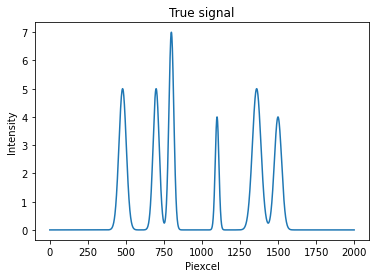

In [2]:
#余計な要素のない理想的な模擬データを作成
x = np.linspace(1, 1000, 2000)
true_signal = (
    + utils.gaussian(x, 5, 240, 12)
    + utils.gaussian(x, 5, 350, 10)
    + utils.gaussian(x, 7, 400, 8)
    + utils.gaussian(x, 4, 550, 6)
    + utils.gaussian(x, 5, 680, 14)
    + utils.gaussian(x, 4, 750, 12)
)
plt.plot(true_signal)
plt.xlabel("Piexcel")
plt.ylabel("Intensity")
plt.title("True signal")
plt.show()

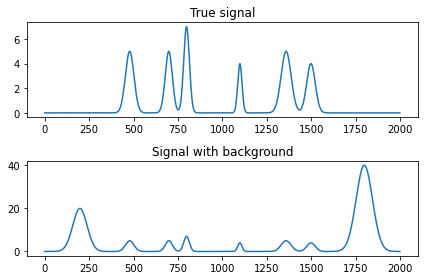

In [3]:
#バックグラウンドスペクトルの追加
true_quartz = utils.gaussian(x, 20, 100, 20)#2000*skewnorm.pdf(x,3,100,100)
true_water  = utils.gaussian(x, 40, 900, 23)

signal_bg = true_signal + true_water + true_quartz

fig = plt.figure(tight_layout=True)
#add_subplot(i,j,k):i行j列のグラフ領域を作成,k個目のグラフ領域を選択
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(true_signal)
ax1.set_title("True signal")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(signal_bg)
ax2.set_title("Signal with background")

plt.show()

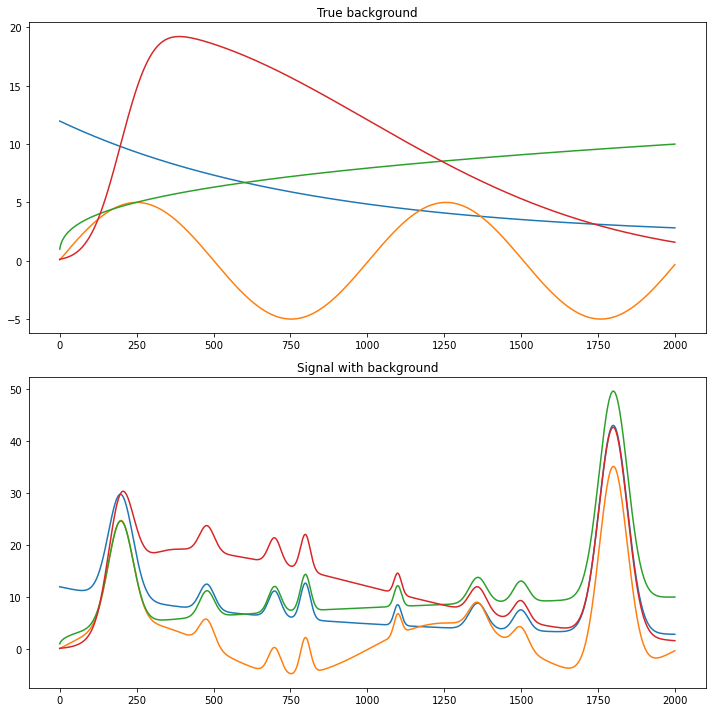

In [4]:
#自家蛍光によるバックグラウンドスペクトル追加
true_baseline_type1 = 2 + 10 * np.exp(-x / 400)
true_baseline_type2 = 5*np.sin(x/80)
true_baseline_type3 = [pow(xi,1/3) for xi in x]
true_baseline_type4 = 10000*skewnorm.pdf(x,10,100,400)
signal_bg_base1 = signal_bg + true_baseline_type1
signal_bg_base2 = signal_bg + true_baseline_type2
signal_bg_base3 = signal_bg + true_baseline_type3
signal_bg_base4 = signal_bg + true_baseline_type4

fig = plt.figure(tight_layout=True,figsize=(10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(true_baseline_type1)
ax1.plot(true_baseline_type2)
ax1.plot(true_baseline_type3)
ax1.plot(true_baseline_type4)
ax1.set_title("True background")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(signal_bg_base1)
ax2.plot(signal_bg_base2)
ax2.plot(signal_bg_base3)
ax2.plot(signal_bg_base4)
ax2.set_title("Signal with background")
plt.show()

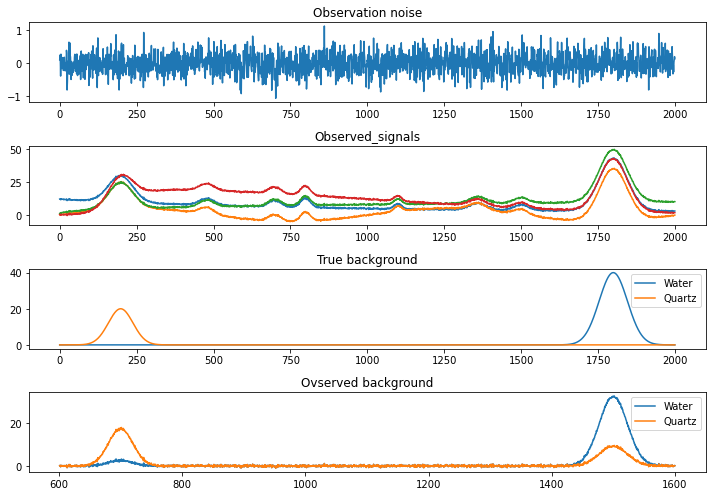

In [5]:
#測定時のノイズを付与
noise = np.random.default_rng(1).normal(0, 0.3, x.size)
observed_signal1 = noise + signal_bg_base1
observed_signal2 = noise + signal_bg_base2
observed_signal3 = noise + signal_bg_base3
observed_signal4 = noise + signal_bg_base4

#測定時にwaterとquartzにピントを合わせて測定しておく True_backgroundは取得できず，混じり合う
observed_water  = pd.Series(0.81*true_water + 0.13*true_quartz,x+600)+noise
observed_quartz = pd.Series(0.23*true_water + 0.87*true_quartz,x+600)+noise

fig = plt.figure(tight_layout=True,figsize=(10,7))
ax1 = fig.add_subplot(4, 1, 1)
ax1.plot(noise)
ax1.set_title("Observation noise")

ax2 = fig.add_subplot(4, 1, 2)
ax2.plot(observed_signal1)
ax2.plot(observed_signal2)
ax2.plot(observed_signal3)
ax2.plot(observed_signal4)
ax2.set_title("Observed_signals")

ax3 = fig.add_subplot(4, 1, 3)
ax3.plot(true_water,label="Water")
ax3.plot(true_quartz,label="Quartz")
ax3.set_title("True background")
ax3.legend()

ax4 = fig.add_subplot(4, 1, 4)
ax4.plot(observed_water,label="Water")
ax4.plot(observed_quartz,label="Quartz")
ax4.set_title("Ovserved background")
ax4.legend()
plt.show()

'observed_signals'

,cell_1,cell_2,cell_3,cell_4
601.000000,12.078802,0.166269,1.103771,0.232646
601.499750,12.209170,0.340322,1.391244,0.380089
601.999500,12.049391,0.224209,1.359069,0.237514
602.499250,11.546905,-0.234631,0.966264,-0.247633
602.998999,12.197068,0.459156,1.713852,0.420008
...,...,...,...,...
1598.001001,2.562516,-0.718602,9.730886,1.342462
1598.500750,2.857418,-0.391557,10.028485,1.633897
1599.000500,2.954512,-0.262304,10.128276,1.727534
1599.500250,3.022919,-0.161725,10.199377,1.792492


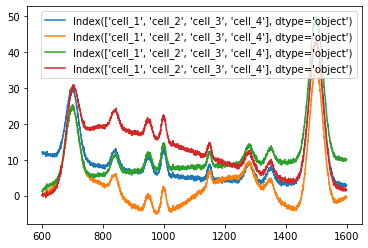

'true_baselines'

,cell_1,cell_2,cell_3,cell_4
601.000000,11.975031,0.062498,1.000000,0.128876
601.499750,11.962576,0.093729,1.144651,0.133495
601.999500,11.950137,0.124956,1.259816,0.138261
602.499250,11.937714,0.156178,1.357073,0.143176
602.998999,11.925305,0.187394,1.442089,0.148245
...,...,...,...,...
1598.001001,2.824962,-0.456155,9.993332,1.604908
1598.500750,2.823932,-0.425043,9.995000,1.600411
1599.000500,2.822904,-0.393913,9.996667,1.595925
1599.500250,2.821876,-0.362768,9.998334,1.591449


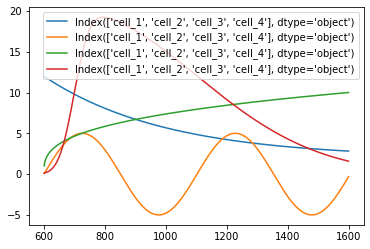

In [6]:
#作成した模擬データをDataFrameにまとめる
cell_names = ["cell_1","cell_2","cell_3","cell_4"]
observed_signals = [observed_signal1,observed_signal2,observed_signal3,observed_signal4]
observed_signals_df = pd.DataFrame(data=observed_signals,index=cell_names,columns=x+600)

true_baselines = [true_baseline_type1,true_baseline_type2,true_baseline_type3,true_baseline_type4]
true_baselines_df = pd.DataFrame(data=true_baselines,index=cell_names,columns=x+600)
observed_signals_df = observed_signals_df.T
true_baselines_df   = true_baselines_df  .T

true_background = pd.DataFrame([true_quartz,true_quartz],index=["quartz","water"],columns=x+600).T

display("observed_signals",observed_signals_df)
plt.plot(observed_signals_df,label=observed_signals_df.columns)
plt.legend()
plt.show()
display("true_baselines",true_baselines_df)
plt.plot(true_baselines_df  ,label=observed_signals_df.columns)
plt.legend()
plt.show()

In [7]:
#保存
pd.Series(true_signal,index=true_baselines_df.index).to_csv("./simulated_spectrum/true_spectrum/spectrum.asc",sep="\t")
for sample_name in true_baselines_df.columns:
    true_baselines_df  [sample_name].to_csv(f"./simulated_spectrum/true_baselines/{sample_name}.asc",sep="\t")
    observed_signals_df[sample_name].to_csv(f"./simulated_spectrum/observed_spectrum/{sample_name}.asc",sep="\t")

true_background  .to_csv(f"./simulated_spectrum/true_backgrounds/spectra.asc",sep="\t")
true_baselines_df.to_csv(f"./simulated_spectrum/true_baselines/spectra.asc"  ,sep="\t")
observed_water   .to_csv("./simulated_spectrum/observed_spectrum/water.asc"  ,sep="\t")
observed_quartz  .to_csv("./simulated_spectrum/observed_spectrum/quartz.asc" ,sep="\t")